In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[
    [
        "ENGINESIZE",
        "CYLINDERS",
        "FUELCONSUMPTION_CITY",
        "FUELCONSUMPTION_HWY",
        "FUELCONSUMPTION_COMB",
        "CO2EMISSIONS",
    ]
]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


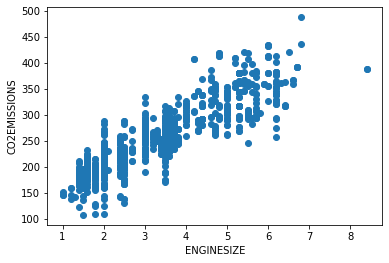

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(msk)
print(~msk)
print(cdf)
print(train)
print(test)

[ True False  True ...  True  True  True]
[False  True False ... False False False]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0            2.0          4                   9.9                  6.7   
1            2.4          4                  11.2                  7.7   
2            1.5          4                   6.0                  5.8   
3            3.5          6                  12.7                  9.1   
4            3.5          6                  12.1                  8.7   
...          ...        ...                   ...                  ...   
1062         3.0          6                  13.4                  9.8   
1063         3.2          6                  13.2                  9.5   
1064         3.0          6                  13.4                  9.8   
1065         3.2          6                  12.9                  9.3   
1066         3.2          6                  14.9                 10.2   

      FUELCONSUMPTION_COMB 

In [7]:
from sklearn import linear_model

In [10]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x, y)
print("coeficients: ", regr.coef_)
print("Intercept:", regr.intercept_)

coeficients:  [[11.63080409  7.30350256  9.20215985]]
Intercept: [68.09594368]


In [15]:
y_hat = regr.predict(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
x = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(test[["CO2EMISSIONS"]])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print("Variance score: %.2f" % regr.score(x, y))

Residual sum of squares: 481.99
Variance score: 0.88


/home/sina/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
